# Encoding ==> Trnasform your categorical data into numerical data . 

In [1]:
# Label Encoding 

# Ordinal Encoding 

# One Hot Encoding (sklearn)

# get dummies (pandas)

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
df = pd.read_csv("C:\\Users\\saurabh\\Desktop\\Newdat\\covid_toy.csv")

In [4]:
df.head() 

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [5]:
df['gender'].value_counts() 

Female    59
Male      41
Name: gender, dtype: int64

In [6]:
df['cough'].value_counts() 

Mild      62
Strong    38
Name: cough, dtype: int64

In [7]:
df['city'].value_counts() 

Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: city, dtype: int64

In [8]:
df['has_covid'].value_counts() 

No     55
Yes    45
Name: has_covid, dtype: int64

In [9]:
df = df.dropna() 

In [13]:
df = df[['gender' , 'cough' , 'city' , 'has_covid']]
df.head()

,gender,cough,city,has_covid
0,Male,Mild,Kolkata,No
1,Male,Mild,Delhi,Yes
2,Male,Mild,Delhi,No
3,Female,Mild,Kolkata,No
4,Female,Mild,Mumbai,No


# 1 . Ordinal Encoder

In [14]:
from sklearn.preprocessing import OrdinalEncoder 

In [21]:
oe = OrdinalEncoder(categories = [['Male' , 'Female'] , ['Mild' , 'Strong'] , ['Kolkata','Bangalore','Delhi','Mumbai'] , ['Yes','No']])

In [22]:
oe

OrdinalEncoder(categories=[['Male', 'Female'], ['Mild', 'Strong'],
                           ['Kolkata', 'Bangalore', 'Delhi', 'Mumbai'],
                           ['Yes', 'No']])

In [23]:
oe.fit(df) 

OrdinalEncoder(categories=[['Male', 'Female'], ['Mild', 'Strong'],
                           ['Kolkata', 'Bangalore', 'Delhi', 'Mumbai'],
                           ['Yes', 'No']])

In [24]:
df_new = oe.transform(df) 

In [26]:
df_new = pd.DataFrame(df_new , columns = df.columns) 

In [27]:
df_new

,gender,cough,city,has_covid
0,0.0,0.0,0.0,1.0
1,0.0,0.0,2.0,0.0
2,0.0,0.0,2.0,1.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,3.0,1.0
...,...,...,...,...
85,1.0,0.0,1.0,1.0
86,1.0,1.0,0.0,0.0
87,1.0,0.0,1.0,1.0
88,1.0,1.0,3.0,1.0


In [28]:
oe.categories_

[array(['Male', 'Female'], dtype=object),
 array(['Mild', 'Strong'], dtype=object),
 array(['Kolkata', 'Bangalore', 'Delhi', 'Mumbai'], dtype=object),
 array(['Yes', 'No'], dtype=object)]

# 2 . Label Encoder 

In [30]:
df.head(2)

,gender,cough,city,has_covid
0,Male,Mild,Kolkata,No
1,Male,Mild,Delhi,Yes


In [31]:
from sklearn.preprocessing import LabelEncoder 

In [32]:
lb = LabelEncoder() 

In [33]:
df['gender'] = lb.fit_transform(df['gender'])
df['cough'] = lb.fit_transform(df['cough'])
df['city'] = lb.fit_transform(df['city'])
df['has_covid'] = lb.fit_transform(df['has_covid'])

In [34]:
df.head() 

,gender,cough,city,has_covid
0,1,0,2,0
1,1,0,1,1
2,1,0,1,0
3,0,0,2,0
4,0,0,3,0


# 3 . Get Dummies 

In [45]:
df = pd.read_csv("C:\\Users\\saurabh\\Desktop\\Newdat\\covid_toy.csv")

In [46]:
# df = df[['gender' , 'cough' , 'city' , 'has_covid']]

In [47]:
df.head() 

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [48]:
pd.get_dummies(df , columns = ['gender' , 'cough' , 'city' , 'has_covid'] , drop_first = True)

,age,fever,gender_Male,cough_Strong,city_Delhi,city_Kolkata,city_Mumbai,has_covid_Yes
0,60,103.0,1,0,0,1,0,0
1,27,100.0,1,0,1,0,0,1
2,42,101.0,1,0,1,0,0,0
3,31,98.0,0,0,0,1,0,0
4,65,101.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
95,12,104.0,0,0,0,0,0,0
96,51,101.0,0,1,0,1,0,1
97,20,101.0,0,0,0,0,0,0
98,5,98.0,0,1,0,0,1,0


# 4 . One Hot Encoding 

In [49]:
df.head() 

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [50]:
from sklearn.preprocessing import OneHotEncoder 

In [51]:
ohe = OneHotEncoder(drop = 'first' , sparse = False)

In [54]:
df_new = ohe.fit_transform(df[['gender' , 'cough' , 'city' , 'has_covid']])

In [56]:
# df_new

# Column Transformer 

In [58]:
df.head() 

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [59]:
df.isnull().sum() 

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [60]:
x = df.drop(columns = ['has_covid'] , axis = 1) 
y = df['has_covid']

In [61]:
from sklearn.model_selection import train_test_split 

In [62]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42) 

# Manually Type Output 

In [63]:
# fever column 
from sklearn.impute import SimpleImputer 

In [65]:
si = SimpleImputer() 
x_train_fever = si.fit_transform(x_train[['fever']])

x_test_fever = si.transform(x_test[['fever']])

In [66]:
x_train_fever.shape

(80, 1)

In [69]:
# Ordinal Encoding ==> gender , cough 

oe = OrdinalEncoder(categories = [['Male','Female'] , ['Mild','Strong']])
x_train_gender_cough = oe.fit_transform(x_train[['gender' , 'cough']])

x_test_gender_cough = oe.transform(x_test[['gender','cough']]) 

In [71]:
x_train_gender_cough.shape

(80, 2)

In [72]:
# One Hot Encoding ==> City 

ohe  = OneHotEncoder(drop = 'first' , sparse = False) 
x_train_city = ohe.fit_transform(x_train[['city']])

x_test_city = ohe.transform(x_test[['city']]) 


In [74]:
x_train_city.shape

(80, 3)

In [75]:
# Extracting Age 

x_train_age = x_train.drop(columns = ['gender' , 'fever' , 'cough' , 'city']).values 

x_test_age = x_test.drop(columns = ['gender' , 'fever' , 'cough' , 'city']).values 

In [76]:
x_train_age.shape

(80, 1)

In [77]:
x_train_transformed = np.concatenate((x_train_age , x_train_fever , x_train_gender_cough , x_train_city) , axis = 1)
x_train_transformed.shape

(80, 7)

# By the help of Column Transformer 

In [78]:
from sklearn.compose import ColumnTransformer 

In [81]:
trf = ColumnTransformer(transformers = [
    ('a' , SimpleImputer() , ['fever']),
    ('b' , OrdinalEncoder(categories = [['Mild','Strong'] , ['Male','Female']]) , ['cough' , 'gender']),
    ('c' , OneHotEncoder(sparse = False , drop = 'first') , ['city'])
] , remainder = 'passthrough') 

In [82]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('a', SimpleImputer(), ['fever']),
                                ('b',
                                 OrdinalEncoder(categories=[['Mild', 'Strong'],
                                                            ['Male',
                                                             'Female']]),
                                 ['cough', 'gender']),
                                ('c', OneHotEncoder(drop='first', sparse=False),
                                 ['city'])])

In [83]:
trf.fit_transform(x_train).shape 

(80, 7)

In [84]:
# Outliers ==> Data points ==> mean update 

In [85]:
# Handle ==> (1). Capping (2).Trimming 

In [91]:
df = pd.read_csv("C:\\Users\\saurabh\\Desktop\\Newdat\\titanic.csv")

In [92]:
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
import matplotlib.pyplot as plt 
import seaborn as sns 

C:\Users\saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

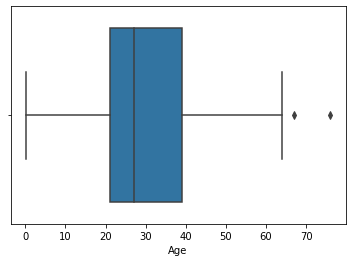

In [93]:
sns.boxplot(df['Age'])

In [95]:
percentile_25 = df['Age'].quantile(0.25) 
percentile_25

21.0

In [96]:
percentile_75 = df['Age'].quantile(0.75) 
percentile_75

39.0

In [97]:
IQR = percentile_75 - percentile_25 
IQR

18.0

In [98]:
upper_limit = percentile_75 + 1.5 * IQR 
upper_limit 

66.0

In [99]:
lower_limit = percentile_25 - 1.5 * IQR 
lower_limit 

-6.0

# Finding Our Outliers 

In [100]:
df[df['Age']>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [101]:
df[df['Age']< lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [102]:
# 1 . Trimming (lower ==> lowest , upper ===> highest) ==> outside data ==> Remove 

In [103]:
new_df = df[df['Age']< upper_limit]

In [105]:
# new_df

C:\Users\saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

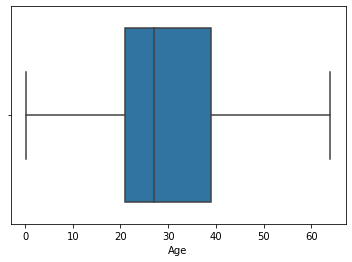

In [107]:
sns.boxplot(new_df['Age'])

# 2 . Capping 

In [108]:
# min = 5
# max=  20 

# min = 4,3,1
# max = 30,40,50

# updated_min_value = 1 
# updated_max_value = 50 

In [109]:
df['Age'] = np.where(
    
    df['Age']>upper_limit , 
    upper_limit ,
    
    np.where(
        df['Age'] < lower_limit , 
        lower_limit , 
        df['Age']
    )


)

C:\Users\saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

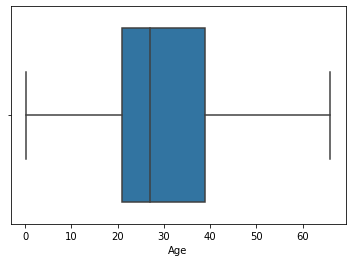

In [110]:
sns.boxplot(df['Age'])